In [2]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 
%matplotlib widget

# Setting the DataFrame up

In [51]:
dataset = fetch_ucirepo(id = 579)
X = dataset.data.features
y = dataset.data.targets['LET_IS']
df = X.join(y)
print(df.shape)
df.head()

(1700, 112)


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,LET_IS
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,...,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0


In [52]:
from utils import *

In [53]:
types = data_type_classifier(df)

In [54]:
categorical = []
binary = []
continuous = []

for key, value in types.items():
    if value == 'Categorical':
        categorical.append(key)
    elif value == 'Binary':
        binary.append(key)
    else:
        continuous.append(key)

print(f'categorical: {categorical}')
print(f'binary: {binary}')
print(f'continuous: {continuous}')

categorical: ['INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'DLIT_AG', 'ZSN_A', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'KFK_BLOOD', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LET_IS']
binary: ['SEX', 'IBS_NASL', 'SIM_GIPERT', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08'

In [56]:
print(len(categorical))
print(len(binary))
print(len(continuous))

23
78
11


In [57]:
df.isnull().sum().sum()

15974

# Missing Values

In [4]:
# every row has at least one missing value
np.sum(df.T.isnull().sum()==0)

0

In [5]:
# generating heatmaps of missing values
# creating 11 heatmaps to visualize each column effectively

heatmaps = []

i = 0
while i < 110:
    fig, ax = plt.subplots()
    sns.heatmap(df.iloc[:,i:i+10].isna().transpose(), cbar=False, ax=ax)

    plt.title("Missing Values", fontsize=12)
    plt.xlabel("Row", fontsize = 10) 
    plt.ylabel("Missing Values", fontsize = 10)
    
    heatmaps.append(fig)

    plt.close(fig)

    i += 10

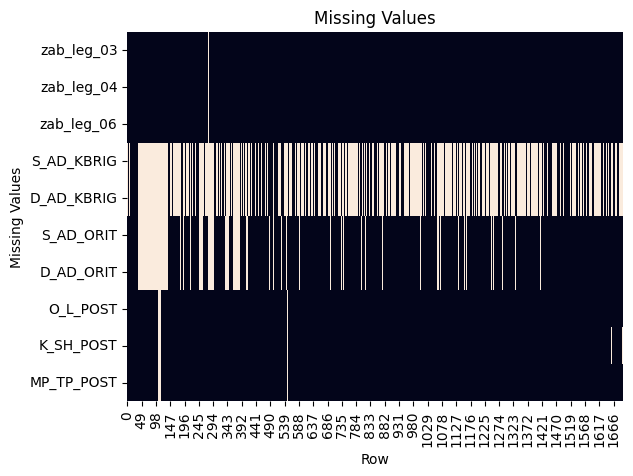

No such comm: 2723a94c084a491ea78604e15a93e48b
No such comm: 2723a94c084a491ea78604e15a93e48b
No such comm: 2723a94c084a491ea78604e15a93e48b
No such comm: 2723a94c084a491ea78604e15a93e48b
No such comm: 2723a94c084a491ea78604e15a93e48b
No such comm: 2723a94c084a491ea78604e15a93e48b
No such comm: eb00dd716d2f4a92ac975aad2f55a96e
No such comm: eb00dd716d2f4a92ac975aad2f55a96e
No such comm: eb00dd716d2f4a92ac975aad2f55a96e
No such comm: eb00dd716d2f4a92ac975aad2f55a96e
No such comm: eb00dd716d2f4a92ac975aad2f55a96e
No such comm: eb00dd716d2f4a92ac975aad2f55a96e
No such comm: a468ba4a4a894a39ad221b2d7e191d62
No such comm: a468ba4a4a894a39ad221b2d7e191d62
No such comm: a468ba4a4a894a39ad221b2d7e191d62
No such comm: df082552ac4346fe8c79c271a838a3a4
No such comm: 221d2f98d10c4f09bdcd1a7429967985
No such comm: 221d2f98d10c4f09bdcd1a7429967985
No such comm: 221d2f98d10c4f09bdcd1a7429967985
No such comm: 221d2f98d10c4f09bdcd1a7429967985
No such comm: 221d2f98d10c4f09bdcd1a7429967985
No such comm:

In [6]:
# white it missing data
heatmaps[3]

In [8]:
# dropping columns where more than 20% of the values are missing
df_dropped = df.dropna(axis=1, thresh=0.75*len(df))
print(df_dropped.shape)
df_dropped.head()

(1700, 105)


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,LET_IS
0,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0
2,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
3,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
4,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0


In [9]:
df_shrunk = df_dropped.dropna(axis = 0, thresh = int(0.75*len(df_dropped.columns)))
df_shrunk.shape

(1624, 105)

## Correlation Analysis for Imputation Models

In [10]:
from utils import *

In [11]:
types = data_type_classifier(df_dropped)

In [12]:
categorical = []
binary = []
continuous = []

for key, value in types.items():
    if value == 'Categorical':
        categorical.append(key)
    elif value == 'Binary':
        binary.append(key)
    else:
        continuous.append(key)

print(f'categorical: {categorical}')
print(f'binary: {binary}')
print(f'continuous: {continuous}')

categorical: ['INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'DLIT_AG', 'ZSN_A', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LET_IS']
binary: ['SEX', 'SIM_GIPERT', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ec

In [13]:
df_cont = df_shrunk[continuous].dropna()
df_cat = df_shrunk[categorical].dropna().drop(['LET_IS'], axis = 1)
df_bin = df_shrunk[binary].dropna()
df_cont.shape, df_cat.shape, df_bin.shape

((896, 9), (1083, 21), (1150, 74))

In [14]:
df_cat

,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,DLIT_AG,ZSN_A,ant_im,lat_im,inf_im,...,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n
0,2.0,1.0,1.0,2.0,3.0,7.0,0.0,1.0,0.0,0.0,...,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,2.0,2.0,2.0,0.0,4.0,1.0,0.0,...,3.0,3.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0
3,0.0,0.0,0.0,2.0,2.0,3.0,1.0,0.0,1.0,1.0,...,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,2.0,3.0,7.0,0.0,4.0,1.0,0.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,0.0,4.0,2.0,1.0,2.0,7.0,0.0,4.0,1.0,0.0,...,3.0,3.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0
1687,2.0,6.0,3.0,1.0,2.0,7.0,0.0,0.0,0.0,4.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1688,1.0,5.0,2.0,2.0,2.0,7.0,2.0,0.0,0.0,2.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1692,0.0,6.0,2.0,2.0,2.0,7.0,0.0,4.0,2.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [15]:
phi_matrix = compute_phi_matrix(df_bin)
phi_matrix

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


,SEX,SIM_GIPERT,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,...,GIPO_K,GIPER_NA,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
SEX,1.000000,-0.073701,0.016584,-0.038317,-0.038328,-0.039845,-0.042783,0.022714,0.004109,-0.011038,...,-0.056557,-0.003915,-0.051450,0.111270,0.081100,-0.029283,0.016922,-0.026379,0.028731,0.056365
SIM_GIPERT,-0.073701,1.000000,0.003169,-0.005379,-0.020960,-0.022334,-0.024867,-0.005379,-0.009325,-0.007610,...,-0.030980,-0.027730,0.018950,-0.038696,0.034660,-0.002032,-0.056434,-0.072461,0.046484,0.013856
nr_11,0.016584,0.003169,1.000000,-0.004660,-0.018161,-0.019350,-0.021545,-0.004660,-0.008079,-0.006594,...,-0.016292,-0.024026,-0.016623,0.038705,-0.026012,0.023428,0.037586,-0.005011,0.019125,0.028415
nr_01,-0.038317,-0.005379,-0.004660,1.000000,-0.003391,-0.003614,-0.004023,-0.000870,-0.001509,-0.001231,...,-0.024482,-0.004487,-0.010023,0.043526,-0.011206,0.020197,0.016815,0.016420,-0.004120,-0.015310
nr_02,-0.038328,-0.020960,-0.018161,-0.003391,1.000000,-0.014082,-0.015679,-0.003391,-0.005879,0.179138,...,-0.079807,-0.017484,0.011268,-0.028412,-0.020578,-0.003503,0.047711,-0.008155,-0.016055,-0.003423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ANT_CA_S_n,-0.029283,-0.002032,0.023428,0.020197,-0.003503,-0.039800,0.037642,0.020197,-0.001558,0.028576,...,-0.027816,-0.021366,-0.085889,-0.013957,-0.155814,1.000000,-0.004313,0.062321,0.027521,-0.005166
GEPAR_S_n,0.016922,-0.056434,0.037586,0.016815,0.047711,0.036322,-0.027934,0.016815,-0.010475,0.023791,...,0.053497,0.005108,0.041017,0.033810,0.027745,-0.004313,1.000000,0.267792,0.005825,-0.020600
ASP_S_n,-0.026379,-0.072461,-0.005011,0.016420,-0.008155,0.017310,-0.031071,0.016420,-0.011651,0.023232,...,0.020523,-0.025472,0.000981,0.029172,0.051139,0.062321,0.267792,1.000000,-0.146343,-0.246692
TIKL_S_n,0.028731,0.046484,0.019125,-0.004120,-0.016055,-0.017107,-0.019047,-0.004120,-0.007142,-0.005829,...,-0.038392,0.021463,-0.005763,-0.012646,0.023447,0.027521,0.005825,-0.146343,1.000000,0.067263


In [16]:
cat_matrix = compute_cramers_v_matrix(df_cat)
cat_matrix

,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,DLIT_AG,ZSN_A,ant_im,lat_im,inf_im,...,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n
INF_ANAM,1.000000,0.233007,0.219212,0.232273,0.102045,0.109527,0.106853,0.111462,0.087784,0.061108,...,0.082591,0.070455,0.111708,0.068809,0.069391,0.088919,0.067439,0.046075,0.074731,0.043920
STENOK_AN,0.233007,1.000000,0.508797,0.535182,0.098959,0.164041,0.096816,0.093430,0.082564,0.086190,...,0.092608,0.096597,0.096904,0.105402,0.086257,0.093986,0.106495,0.079231,0.080267,0.058004
FK_STENOK,0.219212,0.508797,1.000000,0.540116,0.094853,0.116328,0.075252,0.089113,0.069420,0.069516,...,0.075518,0.068150,0.103232,0.089277,0.047974,0.081097,0.102192,0.060989,0.111288,0.070222
IBS_POST,0.232273,0.535182,0.540116,1.000000,0.137934,0.166971,0.088428,0.097055,0.088173,0.100760,...,0.109598,0.063304,0.056915,0.074104,0.054875,0.064436,0.051243,0.047550,0.046345,0.030187
GB,0.102045,0.098959,0.094853,0.137934,1.000000,0.555667,0.084770,0.086749,0.098087,0.073398,...,0.079118,0.076868,0.046392,0.079134,0.069171,0.038870,0.046478,0.029855,0.158817,0.060044
DLIT_AG,0.109527,0.164041,0.116328,0.166971,0.555667,1.000000,0.079163,0.092881,0.102852,0.076012,...,0.090413,0.079732,0.106242,0.069406,0.114405,0.098822,0.069214,0.096919,0.140728,0.086399
ZSN_A,0.106853,0.096816,0.075252,0.088428,0.084770,0.079163,1.000000,0.073769,0.080170,0.067999,...,0.093082,0.050697,0.034127,0.034400,0.040317,0.079989,0.037703,0.072409,0.060772,0.071717
ant_im,0.111462,0.093430,0.089113,0.097055,0.086749,0.092881,0.073769,1.000000,0.376634,0.422464,...,0.097476,0.073120,0.073851,0.070911,0.103967,0.081685,0.091545,0.082639,0.083065,0.110352
lat_im,0.087784,0.082564,0.069420,0.088173,0.098087,0.102852,0.080170,0.376634,1.000000,0.295153,...,0.082740,0.099562,0.040825,0.057083,0.094860,0.041080,0.055315,0.070075,0.076051,0.101290
inf_im,0.061108,0.086190,0.069516,0.100760,0.073398,0.076012,0.067999,0.422464,0.295153,1.000000,...,0.102312,0.061371,0.065755,0.064411,0.073595,0.098084,0.037577,0.050099,0.084642,0.050555


In [17]:
corr_matrix = df_cont.corr('spearman')
corr_matrix

,AGE,S_AD_ORIT,D_AD_ORIT,K_BLOOD,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE
AGE,1.000000,0.086651,-0.005116,-0.023102,0.016745,-0.091461,-0.063166,0.003954,0.220886
S_AD_ORIT,0.086651,1.000000,0.845296,0.040299,0.050511,-0.072187,-0.082165,-0.157740,0.048066
D_AD_ORIT,-0.005116,0.845296,1.000000,0.047476,0.041682,-0.047818,-0.067513,-0.158302,0.043198
K_BLOOD,-0.023102,0.040299,0.047476,1.000000,0.277257,0.015513,0.043475,0.023055,-0.031673
NA_BLOOD,0.016745,0.050511,0.041682,0.277257,1.000000,-0.001090,-0.028839,0.016703,-0.042695
ALT_BLOOD,-0.091461,-0.072187,-0.047818,0.015513,-0.001090,1.000000,0.549399,0.018693,0.003325
AST_BLOOD,-0.063166,-0.082165,-0.067513,0.043475,-0.028839,0.549399,1.000000,0.080222,-0.023366
L_BLOOD,0.003954,-0.157740,-0.158302,0.023055,0.016703,0.018693,0.080222,1.000000,0.015319
ROE,0.220886,0.048066,0.043198,-0.031673,-0.042695,0.003325,-0.023366,0.015319,1.000000


In [18]:
bin_corrs = top_correlated_predictors_df(phi_matrix)
bin_corrs

,1,2,3,4,5
SEX,endocr_01,ritm_ecg_p_07,endocr_03,LID_S_n,ritm_ecg_p_01
SIM_GIPERT,endocr_01,SEX,ASP_S_n,GEPAR_S_n,n_p_ecg_p_11
nr_11,n_r_ecg_p_05,n_p_ecg_p_10,MP_TP_POST,SVT_POST,ritm_ecg_p_02
nr_01,n_p_ecg_p_08,O_L_POST,endocr_01,ritm_ecg_p_07,ritm_ecg_p_01
nr_02,n_p_ecg_p_04,np_01,fibr_ter_05,n_p_ecg_p_03,np_05
...,...,...,...,...,...
ANT_CA_S_n,B_BLOK_S_n,K_SH_POST,n_p_ecg_p_06,ritm_ecg_p_04,NITR_S
GEPAR_S_n,ASP_S_n,n_r_ecg_p_06,fibr_ter_02,zab_leg_01,n_p_ecg_p_06
ASP_S_n,GEPAR_S_n,TRENT_S_n,TIKL_S_n,K_SH_POST,n_p_ecg_p_06
TIKL_S_n,ASP_S_n,fibr_ter_07,fibr_ter_03,fibr_ter_06,TRENT_S_n


In [19]:
cat_corrs = top_correlated_predictors_df(cat_matrix)
cat_corrs

,1,2,3,4,5
INF_ANAM,STENOK_AN,IBS_POST,FK_STENOK,R_AB_2_n,ant_im
STENOK_AN,IBS_POST,FK_STENOK,INF_ANAM,DLIT_AG,NA_R_3_n
FK_STENOK,IBS_POST,STENOK_AN,INF_ANAM,DLIT_AG,NOT_NA_2_n
IBS_POST,FK_STENOK,STENOK_AN,INF_ANAM,DLIT_AG,GB
GB,DLIT_AG,NOT_NA_2_n,IBS_POST,INF_ANAM,STENOK_AN
DLIT_AG,GB,IBS_POST,STENOK_AN,NOT_NA_2_n,FK_STENOK
ZSN_A,INF_ANAM,STENOK_AN,TIME_B_S,IBS_POST,GB
ant_im,inf_im,lat_im,post_im,INF_ANAM,NOT_NA_3_n
lat_im,ant_im,inf_im,post_im,DLIT_AG,NOT_NA_3_n
inf_im,ant_im,lat_im,post_im,TIME_B_S,IBS_POST


In [20]:
cont_corrs = top_correlated_predictors_df(corr_matrix)
cont_corrs

,1,2,3,4,5
AGE,ROE,ALT_BLOOD,S_AD_ORIT,AST_BLOOD,K_BLOOD
S_AD_ORIT,D_AD_ORIT,L_BLOOD,AGE,AST_BLOOD,ALT_BLOOD
D_AD_ORIT,S_AD_ORIT,L_BLOOD,AST_BLOOD,ALT_BLOOD,K_BLOOD
K_BLOOD,NA_BLOOD,D_AD_ORIT,AST_BLOOD,S_AD_ORIT,ROE
NA_BLOOD,K_BLOOD,S_AD_ORIT,ROE,D_AD_ORIT,AST_BLOOD
ALT_BLOOD,AST_BLOOD,AGE,S_AD_ORIT,D_AD_ORIT,L_BLOOD
AST_BLOOD,ALT_BLOOD,S_AD_ORIT,L_BLOOD,D_AD_ORIT,AGE
L_BLOOD,D_AD_ORIT,S_AD_ORIT,AST_BLOOD,K_BLOOD,ALT_BLOOD
ROE,AGE,S_AD_ORIT,D_AD_ORIT,NA_BLOOD,K_BLOOD


In [21]:
df_cont

,AGE,S_AD_ORIT,D_AD_ORIT,K_BLOOD,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE
1,55.0,120.0,90.0,3.5,132.0,0.38,0.18,7.8,3.0
10,71.0,140.0,90.0,3.1,132.0,0.15,0.45,9.1,5.0
11,50.0,130.0,80.0,4.1,140.0,1.13,0.60,9.6,18.0
13,57.0,125.0,80.0,3.4,132.0,1.05,0.37,5.0,27.0
14,55.0,160.0,100.0,3.5,140.0,0.45,0.15,6.7,10.0
...,...,...,...,...,...,...,...,...,...
1691,62.0,140.0,80.0,4.9,133.0,0.15,0.07,10.5,3.0
1692,71.0,110.0,70.0,3.4,133.0,0.52,0.22,5.1,8.0
1694,77.0,150.0,90.0,3.9,136.0,0.23,0.18,5.5,20.0
1695,77.0,110.0,70.0,3.7,130.0,1.05,0.52,12.8,6.0


In [22]:
bools = df_shrunk.isnull().sum() == 0

## Imputation

In [23]:
from fancyimpute import KNN

### KNN

In [24]:
# KNN imputer
knn = KNN(k=4, verbose=0)
df_knn = pd.DataFrame(knn.fit_transform(df_shrunk), columns = df_shrunk.columns)
df_knn.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,LET_IS
0,77.0,1.0,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,55.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
2,52.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,68.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,60.0,1.0,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


Notes: KNN is extremely fast on the entire dataset.

### Iterative Imputer + Random Forest

In [25]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
import joblib

In [26]:
# Original categories for categorical features (replace with actual categories)
cat_mappings = {col: df_shrunk[col].dropna().unique().tolist() for col in categorical}

# Pipelines for categorical, binary, and continuous data
cat_imputer = Pipeline(steps=[
    ('iterative_imputer', IterativeImputer(estimator=RandomForestClassifier(), max_iter=10, random_state=0))
])

bin_imputer = Pipeline(steps=[
    ('iterative_imputer', IterativeImputer(estimator=RandomForestClassifier(), max_iter=10, random_state=0))
])

cont_imputer = Pipeline(steps=[
    ('iterative_imputer', IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=0))
])

# combining the pipelines to fit to the dataset
transformer = ColumnTransformer(
    transformers=[
        ('categorical', cat_imputer, categorical),
        ('binary', bin_imputer, binary),
        ('continuous', cont_imputer, continuous)
    ]
)

#### Running a Test on Subset of Data

In [27]:
"""
# Sample some data
df_samples = df_shrunk.sample(n=10, replace=False, random_state=42)
df_samples_copy = df_samples.copy()

# Reset index to align properly
df_samples.reset_index(drop=True, inplace=True)

# Create a mask for missing values
mask = df_samples.isna()

df_samples_copy
"""

'\n# Sample some data\ndf_samples = df_shrunk.sample(n=10, replace=False, random_state=42)\ndf_samples_copy = df_samples.copy()\n\n# Reset index to align properly\ndf_samples.reset_index(drop=True, inplace=True)\n\n# Create a mask for missing values\nmask = df_samples.isna()\n\ndf_samples_copy\n'

In [28]:
"""
with joblib.parallel_backend('threading'):
    imputed_data = transformer.fit_transform(df_samples)

imputed_df = pd.DataFrame(imputed_data, columns=df_samples.columns)
"""

"\nwith joblib.parallel_backend('threading'):\n    imputed_data = transformer.fit_transform(df_samples)\n\nimputed_df = pd.DataFrame(imputed_data, columns=df_samples.columns)\n"

In [29]:
"""
# Ensure binary columns are rounded to nearest integer (0 or 1)
for column in binary:
    imputed_df[column] = (imputed_df[column] > 0.5).astype(int)

# Map imputed values back to original categories for categorical columns
for column in categorical:
    categories = cat_mappings[column]
    imputed_df[column] = imputed_df[column].round().astype(int)
    imputed_df[column] = imputed_df[column].apply(lambda x: categories[x % len(categories)])

# Copy only the imputed values back to the original DataFrame using the mask
for column in df_samples.columns:
    df_samples.loc[mask[column], column] = imputed_df.loc[mask[column], column]

# Display the imputed DataFrame
df_samples
"""

'\n# Ensure binary columns are rounded to nearest integer (0 or 1)\nfor column in binary:\n    imputed_df[column] = (imputed_df[column] > 0.5).astype(int)\n\n# Map imputed values back to original categories for categorical columns\nfor column in categorical:\n    categories = cat_mappings[column]\n    imputed_df[column] = imputed_df[column].round().astype(int)\n    imputed_df[column] = imputed_df[column].apply(lambda x: categories[x % len(categories)])\n\n# Copy only the imputed values back to the original DataFrame using the mask\nfor column in df_samples.columns:\n    df_samples.loc[mask[column], column] = imputed_df.loc[mask[column], column]\n\n# Display the imputed DataFrame\ndf_samples\n'

#### Imputation on the Entire Dataset

In [30]:
# Reset the index of df_shrunk to ensure alignment
df_shrunk = df_shrunk.reset_index(drop=True)
df_shrunk_copy = df_shrunk.copy()

# Create a mask for missing values
mask = df_shrunk.isna()

df_shrunk_copy

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,LET_IS
0,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0
2,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
3,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
4,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,77.0,0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3
1620,77.0,0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1621,70.0,0,0.0,6.0,2.0,1.0,2.0,0.0,7.0,0.0,...,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1622,79.0,0,2.0,2.0,2.0,1.0,2.0,0.0,7.0,NaN,...,NaN,NaN,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1


In [31]:
# Apply the transformer to the entire DataFrame using parallel processing 
with joblib.parallel_backend('threading'):
    imputed_data = transformer.fit_transform(df_shrunk)

# Convert to DataFrame and retain column names
imputed_df = pd.DataFrame(imputed_data, columns=df_shrunk.columns)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [32]:
# Ensure binary columns are rounded to nearest integer (0 or 1)
for column in binary:
    imputed_df[column] = (imputed_df[column] > 0.5).astype(int)

# Map imputed values back to original categories for categorical columns
for column in categorical:
    categories = cat_mappings[column]
    imputed_df[column] = imputed_df[column].round().astype(int)
    imputed_df[column] = imputed_df[column].apply(lambda x: categories[x % len(categories)])

# Copy only the imputed values back to the original DataFrame using the mask
for column in df_shrunk.columns:
    df_shrunk.loc[mask[column], column] = imputed_df.loc[mask[column], column]

# Display the imputed DataFrame
df_shrunk

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,LET_IS
0,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0
2,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
3,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
4,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,77.0,0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3
1620,77.0,0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1621,70.0,0,0.0,6.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1622,79.0,0,2.0,2.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1


In [33]:
df_shrunk.shape

(1624, 105)

In [34]:
# checking for missing values
df_shrunk.isnull().sum().sum()

0

In [35]:
# creating a new dataframe for model fit 
# this is just to avoid rerunning the entire notebook to recover the dataframe
df_cleaned = df_shrunk
df_cleaned.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,LET_IS
0,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0
2,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
3,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
4,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0


In [36]:
# comparing IterativeImputer and KNN results
comp = (df_cleaned == df_knn)
compvals = comp.values.flatten()
print(len(compvals))
print((compvals == True).sum())
print((compvals == False).sum())

170520
166598
3922


# Dimensionality Reduction

In [37]:
from prince import FAMD
from sklearn.manifold import TSNE, MDS, LocallyLinearEmbedding
from sklearn.preprocessing import StandardScaler

In [38]:
# initializing FAMD model for dimensionality reduction
famd = FAMD(n_components=3)

In [39]:
# splitting features and target - converting target to binary
cleaned_features = df_cleaned.drop(['LET_IS'], axis = 1)
df_cleaned['LET_IS'] = df_cleaned['LET_IS'].apply(lambda x: 0 if x == 0 else 1)
target = df_cleaned['LET_IS']

In [40]:
# scaling continuous data to improve FAMD performance
scaler = StandardScaler()
cleaned_features[continuous] = scaler.fit_transform(cleaned_features[continuous])
cleaned_features.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,1.294261,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,-0.541005,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,-0.791269,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.543471,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,-0.123899,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [41]:
df_famd = pd.DataFrame(famd.fit_transform(cleaned_features))
#df_famd = df_famd.reset_index(drop = True)
df_famd.head()

component,0,1,2
0,2.189997,0.887467,-0.834212
1,-2.325580,-0.675973,2.097459
2,0.015359,-3.777880,2.819994
3,-0.880612,0.160870,-0.443617
4,-0.765991,0.343235,-0.381031


Text(0.5, 0, 'FAMD3')

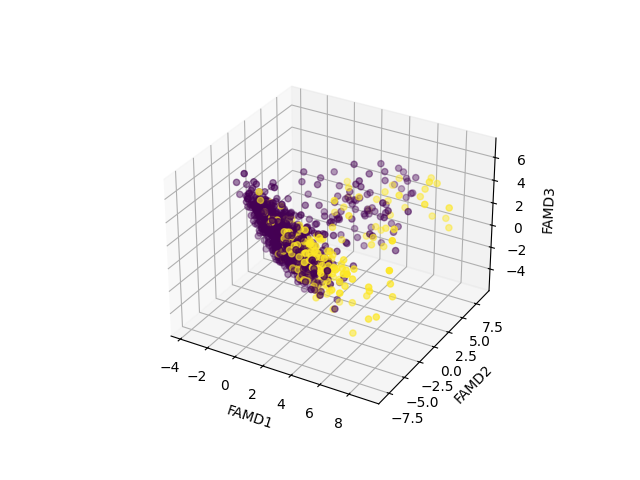

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df_famd.iloc[:,0], df_famd.iloc[:,1], df_famd.iloc[:,2], c = target)
ax.set_xlabel('FAMD1')
ax.set_ylabel('FAMD2')
ax.set_zlabel('FAMD3')

# Model Fit

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, GridSearchCV

In [ ]:
def fit(features, target, components, method):
    # reducing data with FAMD
    famd = FAMD(n_components=components, random_state=42)
    features_reduced = famd.fit_transform(features)

    # converting method parameter to lowercase for exception handling
    method = method.lower()

    # training/testing process for xgboost
    if method == 'xgboost':
        xgb = XGBClassifier()

        # performing grid search for optimal parameters
        params = {
            'n_estimators': np.arange(100, 501, 50),
            'max_depth': np.arange(1, 5, 1),
            'learning_rate': np.arange(0.01, 0.1, 0.01),
            'random_state': [42]
        }

        grid = GridSearchCV(estimator=xgb, 
                                param_grid=params,
                                scoring = 'accuracy', 
                                n_jobs=-1,
                                cv = 10, 
                                verbose = 1
                                )
        grid.fit(features_reduced, target)

        # extracting optimal model
        optimal_estimator = grid.best_estimator_
    
        # running 10-fold Stratified CV with the best estimator
        skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

        # initializing lists to hold data from each fold
        conf_matrix_vals = []
        y_test_vals = []
        y_preds = []


        # fitting model to training data for each  fold - and generating predictions
        for train_index, test_index in skf.split(features_reduced, target):
            # splitting intro train and test sets
            X_train, X_test = features_reduced.iloc[train_index], features_reduced.iloc[test_index]
            y_train, y_test = target.iloc[train_index], target.iloc[test_index]

            # fitting the model and generating predictions
            optimal_estimator.fit(X_train, y_train)
            preds = optimal_estimator.predict(X_test)

            # appending test data and predictions for each fold to the lists
            y_preds.extend(preds)
            y_test_vals.extend(y_test)

            # appending confusion matrices for each fold to a list
            matrix = confusion_matrix(y_test, preds)
            conf_matrix_vals.append(matrix)

        # summing the confusion matrices from each fold
        conf_matrix = np.sum(conf_matrix_vals, axis = 0)

        # creating a confusion matrix display 
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
        disp.plot()
        plt.show()

        report = classification_report(y_true = y_test_vals, y_pred=y_preds, target_names=['0', '1'])
        print(report)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/opt/anaconda3/lib/python3.11/site-packages/prince/pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.4308743544928218, -0.5606668267700471]'. Picking the first and converting the rest.
  X = self.scaler_.transform(X.to_numpy())
/opt/anaconda3/lib/python3.11/site-packages/prince/pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.4308743544928218, -0.5606668267700471]'. Picking the first and converting the rest.
  X = self.scaler_.transform(X.to_numpy())


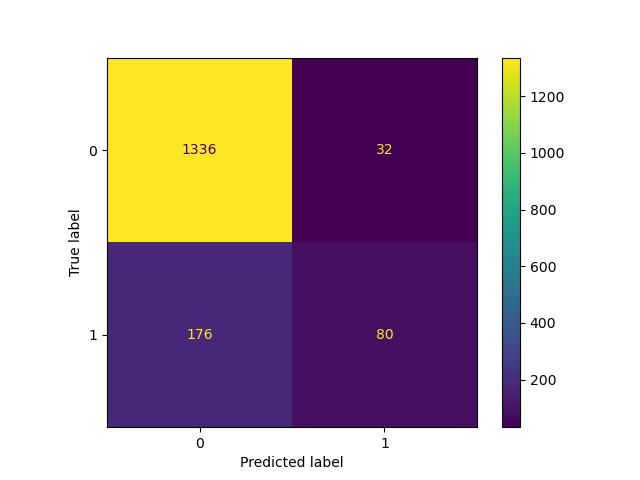

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1368
           1       0.71      0.31      0.43       256

    accuracy                           0.87      1624
   macro avg       0.80      0.64      0.68      1624
weighted avg       0.86      0.87      0.85      1624



In [ ]:
fit(cleaned_features, df_cleaned['LET_IS'], 3, 'xgboost')

In [ ]:
# Function to evaluate FAMD with different dimensions
"""
def evaluate_famd(dimensions, features, target):
    results = {}
    for n_components in dimensions:
        famd = FAMD(n_components=n_components, random_state=42)
        transformed_features = famd.fit_transform(features)
        
        X_train, X_test, y_train, y_test = StratifiedShuffleSplit(transformed_features, target, test_size=0.3, random_state=42)
        
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        results[n_components] = accuracy
        print(f'FAMD with {n_components} dimensions: Accuracy = {accuracy:.4f}')
    return results

dimensions_to_test = [2, 3, 4, 5, 6, 7]

results = evaluate_famd(dimensions_to_test, cleaned_features, target_values)

print(results)
"""

In [61]:
target.value_counts()

0    1368
1     256
Name: LET_IS, dtype: int64